## Lab8.Animal Classification using Decision trees

### 225229138-Sowmiya B

### Step 1:Create Dataset

### Step2: Model builiding using ID3

#### import dataset

In [1]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head()

,Toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal


In [2]:
df.shape

(10, 5)

In [3]:
df.size

50

In [4]:
df.describe()

,Toothed,hair,breathes,legs,species
count,10,10,10,10,10
unique,2,2,2,2,2
top,True,True,True,True,Mammal
freq,8,6,9,7,6


In [5]:
X=df.drop(['species'],axis=1)

In [6]:
X

,Toothed,hair,breathes,legs
0,True,True,True,True
1,True,True,True,True
2,True,False,True,False
3,False,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,False,False,False
7,True,False,True,False
8,True,True,True,True
9,False,False,True,True


In [7]:
y=df['species'].values

In [8]:
y

array(['Mammal', 'Mammal', 'Reptile', 'Mammal', 'Mammal', 'Mammal',
       'Reptile', 'Reptile', 'Mammal', 'Reptile'], dtype=object)

#### Split dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#### create DT model

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion = "entropy")

#### perform training and testing

In [11]:
clf_entropy =clf_entropy.fit(X_train,y_train)
clf_entropy

DecisionTreeClassifier(criterion='entropy')

In [12]:
y_pred_entropy = clf_entropy.predict(X_test)
y_pred_entropy

array(['Reptile', 'Mammal', 'Mammal', 'Reptile'], dtype=object)

#### Print accuracy and classification report

In [13]:
from sklearn.metrics import accuracy_score
print ("Accuracy for ID3: ",accuracy_score(y_test,y_pred_entropy))

Accuracy for ID3:  1.0


In [14]:
from sklearn.metrics import classification_report
print("Classification Report of ID3 : ",classification_report(y_test, y_pred_entropy))

Classification Report of ID3 :                precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00         2
     Reptile       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



#### Interpret your results

In [15]:
from sklearn import tree

#### Visualilze your DT model using graphviz

In [16]:
with open('tree1.dot','w') as f:
    f = tree.export_graphviz(clf_entropy,
    out_file=f,
    max_depth=4,
    impurity=False,
    feature_names = X.columns.values,
    class_names = ['Reptile','Mammal'],
    filled=True)

In [17]:
!type tree1.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="hair <= 0.5\nsamples = 6\nvalue = [4, 2]\nclass = Reptile", fillcolor="#f2c09c"] ;
1 [label="samples = 2\nvalue = [0, 2]\nclass = Mammal", fillcolor="#399de5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 4\nvalue = [4, 0]\nclass = Reptile", fillcolor="#e58139"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


[Text(170.9,168.33,'X[1] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(85.45,56.11,'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(256.35,56.11,'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

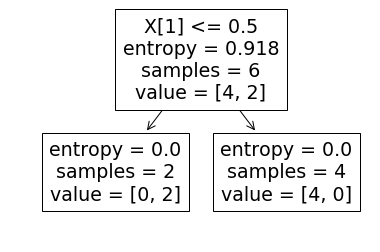

In [19]:
tree.plot_tree(clf_entropy)

### Step3:Create a test set

In [29]:
file=pd.read_csv("test_file.csv")

In [30]:
file

,Toothed,hair,breathes,legs
0,False,False,True,False
1,False,True,True,True
2,True,False,True,True


### Step4. [Perform prediction]

In [31]:
y_pred_entropy=clf_entropy.predict(file)
y_pred_entropy

array(['Reptile', 'Mammal', 'Reptile'], dtype=object)